```
=================================================
Milestone 1

Nama  : Achmad Dhani
Batch : HCK-009

This notebook consist of importing data from keggle, cleaning the data and proceed to analyize based on SMART and fishbone that's created.
The result then visualized with Tableu.
=================================================


In [1]:
# it's you again pandas
import pandas as pd

In [192]:
df = pd.read_csv("zomato.csv") # importing the data

In [193]:
df.tail() # displaying the bottom data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [194]:
df.columns # summary of the data

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [195]:
df.info() # summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [196]:
df.select_dtypes('object').describe() # summary of the data that is object type

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [197]:
df['listed_in(type)'].value_counts() # looking at the unique and it's count

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [198]:
df['listed_in(city)'].value_counts() # looking at the unique and it's count

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

---

# SMART Framework

```
Specific:
#Partner with diverse and well-rated restaurants across different cities to maximize my potential returns on investment.

Measurable:
#Secure partnerships with at least one restaurant from each type.
#Collaborate with restaurants from variety of locations.
#Track the correlation between restaurants with high votes and their availability features to gauge customer preference trends.
#Track the ROI from each restaurant partnership.

Achievable:
#Utilize Zomato's extensive database to collect data on restaurant types, locations, ratings, availability for booking and online orders, and costs.
#Analyze the dataset to derive insights into consumer trends and preferences.

Relevant:
#Prioritize restaurants with higher ratings to minimize investment risk.
#Seek partnerships with mid-range priced restaurants so it can cater to a broad spectrum of customers, balancing quality and affordability.
#Partner with restaurants that offer strong availability features, such as online ordering and table reservations, to cater to a diverse range of customer preferences.
#Partner with restaurants whose pricing aligns with the trends in each location to appeal to the appropriate target customers
#Partner with restaurants that has established and had customers

Time-Bound:
#Complete data analysis and gathering by the end of next week.
#Initiate and finalize discussions with potential restaurant managers/owners within the next month.

---

# Fish Bone Diagram

```
Head (Problem Statement): Identify restaurants with high ratings that align with the trending types and price ranges of their respective locations for maximum potential investment.

Bones(Potential Variables): These are the factors that can contribute which restaurant to partner

## Rating
$ Rating represents the customers overall fullfilment regarding the restaurant's service.
$ The higher the rating the more satisfied customers are which results in better customer's confidence
$ Rating is validated by the amount of votes since the rating displayed is an average from total votes

## Votes
$ Votes represents appx amount of customers that has visited and paid for the restaurant service.
$ The amount of votes validates the rating of the restaurant
$ Higher votes can also influence new customers to come from old customer's self promotion
$ Explore the correlation between votes and other restaurant features to understand influencing factors (type and availbility).

## Location
$ Location represents where the restaurant is established
$ Investing restaurants in a variety of locations will stabilize and increase the broad of portofolio. (like index funds)
$ Each Location has their own culture and market tied to determine their restaurant trend

## Restaurant Type
$ Restaurants have different types like bar, buffet, etc
$ Each type has it's own uniqueness that caters to each customer (vote)
$ Each location has it's own restaurant type trend
$ Investing a variety of types will broaden the portofolio and cover the whole market.

# Cost
$ Cost indicates the amount needed to spend for the restaurant's service
$ Each customer(vote) has different budget to spend for the service
$ Price trend of restaurants in each location is important for restaurants to appeal the appropriate customers
$ High rated restaurants could have or set the cost trend

# Availability
$ Availability indicates a restaurant's adaptability and modern features
$ Features like online ordering and table reservations can enhance customer convenience and accessibility
$ Analyze the relationship between a restaurant's availability features and its votes to gauge specific influences on customer preferences.

---

# Data Cleaning


In [1]:
# pandas FTW
import pandas as pd

In [2]:
df = pd.read_csv("zomato.csv") #reading the csv

In [3]:
df.info() # it show's the summary of the data and if there is NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df1 = df.drop_duplicates() # dropping duplicates if there is any

In [5]:
df1.info() # no duplicates :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
columns_to_drop = ['address', 'phone', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item']
df1.drop(columns=columns_to_drop, inplace = True) # dropping the columns that is not relevant, bye bye

In [7]:
df1.info() # the result of dropping the columns, was 16 become 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [8]:
df2 = df1.copy() #checkpoint!

In [9]:
df2.loc[df2['rest_type'].isnull()].head() # Looking to see and understand what the NULL means since there are duplicate columns

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
999,https://www.zomato.com/bangalore/mughlai-kitch...,Mughlai Kitchen,Yes,No,3.5/5,269,BTM,NaN,600,Delivery,Bannerghatta Road
1300,https://www.zomato.com/bangalore/eat-joy-resta...,Eat & Joy Restaurant,Yes,No,3.0/5,7,JP Nagar,NaN,300,Delivery,Bannerghatta Road
1376,https://www.zomato.com/bangalore/kababish-rest...,Kababish Restaurant,Yes,No,3.6/5,15,BTM,NaN,700,Delivery,Bannerghatta Road
1565,https://www.zomato.com/bangalore/goli-vada-pav...,Goli Vada Pav No 1,No,No,NaN,0,Bannerghatta Road,NaN,150,Delivery,Bannerghatta Road
1637,https://www.zomato.com/bangalore/ammis-biryani...,Ammi's Biryani,No,No,2.4/5,392,Bannerghatta Road,NaN,500,Delivery,Bannerghatta Road


In [10]:
df2.loc[df2['location'].isnull()].head() # same as above but for location

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,Delivery,Bannerghatta Road
9874,https://www.zomato.com/bangalore/papa-khan-ras...,Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,Delivery,BTM
13693,https://www.zomato.com/bangalore/mohabbat-desi...,Mohabbat Desi Restaurant,No,No,NaN,0,NaN,NaN,NaN,Delivery,Electronic City
16351,https://www.zomato.com/bangalore/desi-chatkara...,Desi Chatkara,No,No,NaN,0,NaN,NaN,NaN,Delivery,HSR
26432,https://www.zomato.com/bangalore/new-taj-birya...,New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,Dine-out,Kammanahalli


In [11]:
df2.drop(columns=['location', 'rest_type'], inplace = True) # these column has NULL values unlike the other duplicate who has data in it so, bye bye

In [12]:
df2.head() # looking nice

,url,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,600,Buffet,Banashankari


In [13]:
df3 = df2.copy() # another one

In [14]:
# renaming so for convinience and make it look pretty
df3 = df2.rename(columns={'approx_cost(for two people)': 'cost_for_two', 'listed_in(type)': 'type', 'listed_in(city)': 'location', 'rate':'ratings'})

In [15]:
df3.columns # looks good

Index(['url', 'name', 'online_order', 'book_table', 'ratings', 'votes',
       'cost_for_two', 'type', 'location'],
      dtype='object')

In [16]:
df3.info() # time to deal with the other NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   name          51717 non-null  object
 2   online_order  51717 non-null  object
 3   book_table    51717 non-null  object
 4   ratings       43942 non-null  object
 5   votes         51717 non-null  int64 
 6   cost_for_two  51371 non-null  object
 7   type          51717 non-null  object
 8   location      51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [17]:
# isolating data that has missing values in cost_for_two or ratings column
missing = df3.loc[(df3['cost_for_two'].isnull()) | (df3['ratings'].isnull())]
missing.head()

,url,name,online_order,book_table,ratings,votes,cost_for_two,type,location
84,https://www.zomato.com/bangalore/chill-out-ban...,Chill Out,No,No,NaN,0,100,Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,Me And My Cake,No,No,NaN,0,500,Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,Sunsadm,No,No,NaN,0,400,Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,Annapooraneshwari Mess,No,No,NaN,0,200,Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,Coffee Shopee,No,No,NaN,0,250,Delivery,Banashankari


In [18]:
df3.drop(missing.index, inplace = True) # dropping the missing values by index, bye bye

In [19]:
df3.info() # nice and clean

<class 'pandas.core.frame.DataFrame'>
Index: 43690 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           43690 non-null  object
 1   name          43690 non-null  object
 2   online_order  43690 non-null  object
 3   book_table    43690 non-null  object
 4   ratings       43690 non-null  object
 5   votes         43690 non-null  int64 
 6   cost_for_two  43690 non-null  object
 7   type          43690 non-null  object
 8   location      43690 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.3+ MB


In [20]:
df3.reset_index(drop=True, inplace=True) # resetting index

In [21]:
df4 = df3.copy() # another one

In [22]:
#changing data type
df4[['online_order', 'book_table']] = df4[['online_order', 'book_table']].replace({'Yes':True,'No':False})
df4[['online_order', 'book_table']].head()

,online_order,book_table
0,True,True
1,True,False
2,True,False
3,False,False
4,False,False


In [23]:
# removing substring to change into the correct data type
df4['cost_for_two'] = df4['cost_for_two'].str.replace(',', '')
df4['cost_for_two'] = df4['cost_for_two'].astype(int)

In [24]:
df4.info() # very nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43690 entries, 0 to 43689
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           43690 non-null  object
 1   name          43690 non-null  object
 2   online_order  43690 non-null  bool  
 3   book_table    43690 non-null  bool  
 4   ratings       43690 non-null  object
 5   votes         43690 non-null  int64 
 6   cost_for_two  43690 non-null  int64 
 7   type          43690 non-null  object
 8   location      43690 non-null  object
dtypes: bool(2), int64(2), object(5)
memory usage: 2.4+ MB


In [25]:
# replacing substring for ratings column
df4['ratings'] = df4['ratings'].str.replace('/5', '').str.replace('-', 'NEW')

In [26]:
df5 = df4.copy() # checkpointtt!

In [27]:
df5.loc[df5['votes'] == 16832]

,url,name,online_order,book_table,ratings,votes,cost_for_two,type,location
41686,https://www.zomato.com/bangalore/byg-brewski-b...,Byg Brewski Brewing Company,True,True,4.9,16832,1600,Delivery,Sarjapur Road
42034,https://www.zomato.com/bangalore/byg-brewski-b...,Byg Brewski Brewing Company,True,True,4.9,16832,1600,Dine-out,Sarjapur Road
42400,https://www.zomato.com/bangalore/byg-brewski-b...,Byg Brewski Brewing Company,True,True,4.9,16832,1600,Drinks & nightlife,Sarjapur Road


In [28]:
# Find duplicate names T^T
duplicated_names = df5[df5['name'].duplicated(keep=False)]['name'].unique()

# For each duplicated name, identify the rows with 'delivery' or 'dine-out' to be dropped ಠ╭╮ಠ
rows_to_drop = []
for name in duplicated_names:
    sub_df = df5[df5['name'] == name]
    drop_index = sub_df[(sub_df['type'] == 'Delivery') | (sub_df['type'] == 'Dine-out')].index
    rows_to_drop.extend(drop_index)

# Drop the identified rows (づ￣ ³￣)づ
df5 = df4.drop(rows_to_drop)

In [29]:
# saving a csv file only for restaurants that's new
data_new = df5.loc[df5['ratings'] == 'NEW']
data_new.to_csv("new_resto.csv", index = False) # saveeeee

In [30]:
df6 = df5.loc[df5['ratings'] != 'NEW'] # dataframe for restaurant 

In [31]:
# Removing rows that has rating but no votes ._. no cheating bro
invalid = df6.loc[df6['votes'] == 0] 
print(f"{len(invalid)} invalid data")
invalid
data = df6.drop(invalid.index)
data.reset_index(drop = True, inplace = True)

2 invalid data
                                                     url  \
7085   https://www.zomato.com/bangalore/tangerine-dav...   
18366  https://www.zomato.com/bangalore/sri-brahmi-ku...   

                                             name  online_order  book_table  \
7085   Tangerine - Davanam Sarovar Portico Suites          True        True   
18366                          Sri Brahmi Kuteera         False       False   

      ratings  votes  cost_for_two      type   location  
7085      4.0      0          1100    Buffet        BTM  
18366    3.4       0           150  Dine-out  Jayanagar  


In [32]:
data.loc[:, 'ratings'] = data['ratings'].astype(float) # changing the ratings into the correct data type
data.to_csv("resto.csv", index = False) # saving the file!

---

# Data Analysis

In [221]:
# we'll be needing this
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## General View

In [222]:
df = pd.read_csv("resto.csv") # reading the cleaned file (⁠⁠ꈍ⁠ᴗ⁠ꈍ⁠)

In [223]:
df.head() # top 5 data ╮⁠(⁠.⁠ ⁠❛⁠ ⁠ᴗ⁠ ⁠❛⁠.⁠)⁠╭

,url,name,online_order,book_table,ratings,votes,cost_for_two,type,location
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,True,True,4.1,775,800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,True,False,4.1,787,800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,True,False,3.8,918,800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,False,False,3.7,88,300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,False,False,3.8,166,600,Buffet,Banashankari


In [224]:
df.describe() # summary of data's that can be aggregated

,ratings,votes,cost_for_two
count,7332.000000,7332.000000,7332.000000
mean,3.854774,578.896618,798.846154
std,0.442233,1278.514204,591.357208
min,2.000000,2.000000,50.000000
25%,3.600000,27.000000,400.000000
50%,3.900000,108.000000,600.000000
75%,4.200000,510.250000,1100.000000
max,4.900000,16832.000000,5000.000000


In [225]:
df.columns # column names ╮⁠(⁠.⁠ ⁠❛⁠ ⁠ᴗ⁠ ⁠❛⁠.⁠)⁠╭

Index(['url', 'name', 'online_order', 'book_table', 'ratings', 'votes',
       'cost_for_two', 'type', 'location'],
      dtype='object')

In [226]:
def summarize_data(data, columns):
    '''
    This function is used to apply aggregation functions to multiple column, making it into a new dataframe.
    The parameter used is the dataframe, and the list of columns.
    It covers, mean, median, standard deviation, skewness, and kurtosis.
    '''
    summary = {
        "section": [],
        "mean": [],
        "median": [],
        "std": [],
        "skew": [],
        "kurtosis": []
    }

    for col in columns:
        summary["section"].append(col)
        summary["mean"].append(data[col].mean())
        summary["median"].append(data[col].median())
        summary["std"].append(data[col].std())
        summary["skew"].append(data[col].skew())
        summary["kurtosis"].append(data[col].kurtosis())

    return pd.DataFrame(summary)
    
cols = ['ratings', 'votes', 'cost_for_two']

summary_data = summarize_data(df, cols)
summary_data

,section,mean,median,std,skew,kurtosis
0,ratings,3.854774,3.9,0.442233,-0.503771,0.090722
1,votes,578.896618,108.0,1278.514204,4.857765,33.710626
2,cost_for_two,798.846154,600.0,591.357208,1.503614,3.112937


In [227]:
df['type'].value_counts() # how many types of restaurant out there and the count

type
Desserts              2714
Cafes                 1511
Drinks & nightlife    1045
Buffet                 847
Pubs and bars          632
Dine-out               306
Delivery               277
Name: count, dtype: int64

In [228]:
df['location'].value_counts() #so many restaurants in each city ◉_◉

location
Church Street            387
Koramangala 7th Block    382
Brigade Road             377
BTM                      371
MG Road                  366
Indiranagar              358
Lavelle Road             349
Koramangala 4th Block    332
Koramangala 5th Block    326
Koramangala 6th Block    317
Residency Road           300
Whitefield               253
Old Airport Road         248
Jayanagar                242
JP Nagar                 229
HSR                      217
Malleshwaram             206
Rajajinagar              202
Electronic City          202
Marathahalli             192
Basavanagudi             171
Sarjapur Road            168
Bannerghatta Road        163
Frazer Town              162
Bellandur                156
Kalyan Nagar             148
Kammanahalli             139
Brookefield              137
New BEL Road             124
Banashankari             108
Name: count, dtype: int64

In [229]:
df['online_order'].value_counts()

online_order
False    4041
True     3291
Name: count, dtype: int64

In [230]:
df['book_table'].value_counts()

book_table
False    5299
True     2033
Name: count, dtype: int64

---

### Analyze the relationship between a restaurant's availability features and its votes to gauge specific influences on customer preferences.

In [231]:
def aggregate_avail(df, column):
    """
    This function aggregates data to create a dataframe that shows restaurant types with respective counts for 
    'book_table' (True/False) and 'online_order' (True/False).
    The parameter needed is the dataframe and a column.
    """

    unique_types = df[column].unique()
    
    data = {}
    for uni in unique_types:
        data[uni] = {
            'book_table_True': df[(df[column] == uni) & (df['book_table'] == True)][column].count(), # condition and count
            'book_table_False': df[(df[column] == uni) & (df['book_table'] == False)][column].count(),
            'online_order_True': df[(df[column] == uni) & (df['online_order'] == True)][column].count(),
            'online_order_False': df[(df[column] == uni) & (df['online_order'] == False)][column].count()
        }
        
    result_df = pd.DataFrame(data).T
    return result_df

avail_type = aggregate_avail(df, 'type')
avail_type

,book_table_True,book_table_False,online_order_True,online_order_False
Buffet,547,300,347,500
Cafes,273,1238,848,663
Delivery,7,270,193,84
Desserts,137,2577,1458,1256
Dine-out,33,273,27,279
Drinks & nightlife,646,399,233,812
Pubs and bars,390,242,185,447


In [232]:
avail_locate = aggregate_avail(df, 'location') # calling the function above but using location as argument
avail_locate

,book_table_True,book_table_False,online_order_True,online_order_False
Banashankari,5,103,51,57
Bannerghatta Road,26,137,86,77
Basavanagudi,23,148,86,85
Bellandur,49,107,88,68
Brigade Road,126,251,136,241
Brookefield,30,107,64,73
BTM,112,259,191,180
Church Street,140,247,133,254
Electronic City,38,164,81,121
Frazer Town,28,134,67,95


### Votes and Online Ordering

In [233]:
from scipy.stats import mannwhitneyu

# Votes for online order
votes_online = df[df['online_order'] == True]['votes']

# Votes for no online order
votes_no_online = df[df['online_order'] == False]['votes']

# Mann-Whitney U test
stat, p = mannwhitneyu(votes_online, votes_no_online)
print(f"Statistic: {stat}")
print(f"p-value = {p}")

Statistic: 7787844.5
p-value = 1.4772016516230755e-36


```
this p-value is much smaller, indicating strong evidence against the null hypothesis. The null hypothesis for the Mann-Whitney U test is that the distributions of the two groups are the same.
Interpretation:

There is a statistically significant difference in the number of votes between restaurants that offer online ordering and those that don't. Given the U statistic alone, we can't determine which group has more votes on average, but the significant p-value confirms that a difference exists. Given the context and the nature of online ordering (potentially reaching a larger audience), one might speculate that restaurants offering online ordering might receive more votes, but further analysis (like comparing medians or means) would be needed to confirm the direction of the difference.

In [234]:
median_votes_online = df[df['online_order'] == True]['votes'].median() # median of the votes for restaurant with online order
median_votes_no_online = df[df['online_order'] == False]['votes'].median() # median of the votes for restaurant without online order

print(f"Median votes for restaurants with online ordering: {median_votes_online}")
print(f"Median votes for restaurants without online ordering: {median_votes_no_online}")

Median votes for restaurants with online ordering: 148.0
Median votes for restaurants without online ordering: 74.0


In [235]:
mean_votes_online = df[df['online_order'] == True]['votes'].mean() # mean of the votes for restaurant with online order
mean_votes_no_online = df[df['online_order'] == False]['votes'].mean() # mean of the votes for restaurant without online order

print(f"Mean votes for restaurants with online ordering: {mean_votes_online:.2f}")
print(f"Mean votes for restaurants without online ordering: {mean_votes_no_online:.2f}")

Mean votes for restaurants with online ordering: 607.35
Mean votes for restaurants without online ordering: 555.72


### Visualization

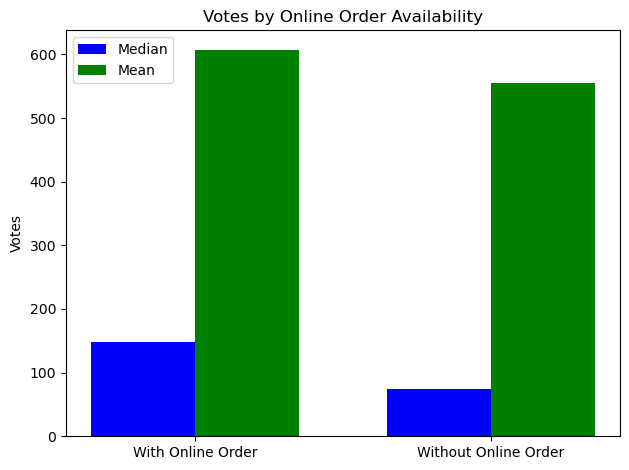

In [236]:
# Data ༼ つ ಥ_ಥ ༽つ
labels = ['With Online Order', 'Without Online Order']
median_values = [median_votes_online, median_votes_no_online]
mean_values = [mean_votes_online, mean_votes_no_online]

x = np.arange(len(labels))  # the label locations
width = 0.35 

fig, ax = plt.subplots()

# Bars
bars1 = ax.bar(x - width/2, median_values, width, label='Median', color='blue')
bars2 = ax.bar(x + width/2, mean_values, width, label='Mean', color='green')

# labelling ヾ(⌐■_■)ノ♪
ax.set_ylabel('Votes')
ax.set_title('Votes by Online Order Availability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


```
Median Votes: The median, which is less affected by extreme values (outliers), indicates that restaurants offering online ordering tend to receive double the votes compared to those that don't offer online ordering.

Mean Votes: The mean values also indicate a difference. Restaurants with online ordering receive, on average, about 51.63 more votes than those without online ordering.

From this analysis, it appears that having the feature of online ordering correlates with more customer using the service, which suggests greater visibility or popularity. The larger difference in medians compared to means might suggest the presence of a few very popular restaurants with online ordering that have a large number of votes, skewing the average upward. This is why the median offers a different perspective and is often preferred for skewed data.

### Votes and Book Table

In [237]:
# Votes for book table
votes_book = df[df['book_table'] == True]['votes']

# Votes for no book table
votes_no_book = df[df['book_table'] == False]['votes']

# Mann-Whitney U test
stat, p = mannwhitneyu(votes_book, votes_no_book)
print(f"Statistic: {stat}")
print(f"p-value = {p}")

Statistic: 9333540.5
p-value = 0.0


```
This p-value indicates that the correlation is highly statistically significant. The observed difference between the number of votes for restaurants that offer table booking and those that don't is very unlikely to be due to random chance.
Interpretation:
There's a statistically significant difference in the number of votes between restaurants that offer table booking and those that don't. To determine which group (restaurants with table booking vs. those without) tends to have more votes on average, you'll need to compare the medians or means of votes for each group, similar to the previous analysis with online ordering.

You can follow the same steps as before to calculate and compare the medians and means. This will give you a clearer picture of the direction of the difference and its real-world implications.

In [238]:
median_votes_book = df[df['book_table'] == True]['votes'].median() # median for votes that has booking
median_votes_no_book = df[df['book_table'] == False]['votes'].median() # median for votes that doesnt have booking

print(f"Median votes for restaurants with table booking: {median_votes_book:.2f}")
print(f"Median votes for restaurants without table booking: {median_votes_no_book:.2f}")

Median votes for restaurants with table booking: 715.00
Median votes for restaurants without table booking: 51.00


In [239]:
mean_votes_book = df[df['book_table'] == True]['votes'].mean() # mean for votes that does have booking
mean_votes_no_book = df[df['book_table'] == False]['votes'].mean() # mean for votes that doesnt have booking

print(f"Mean votes for restaurants with table booking: {mean_votes_book:.2f}")
print(f"Mean votes for restaurants without table booking: {mean_votes_no_book:.2f}")

Mean votes for restaurants with table booking: 1373.86
Mean votes for restaurants without table booking: 273.90


### Visualization

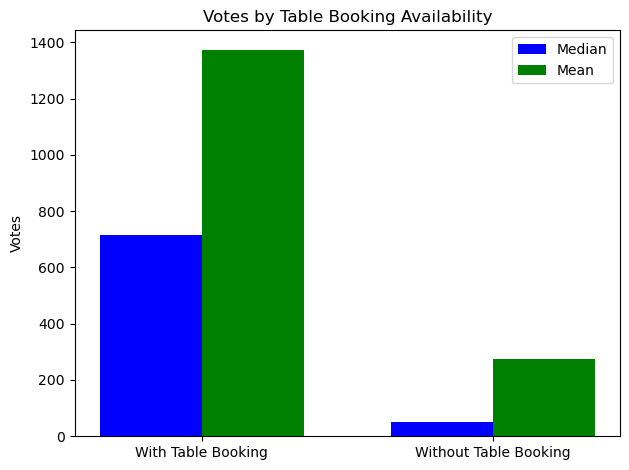

In [240]:
# Data again
labels = ['With Table Booking', 'Without Table Booking']
median_values = [median_votes_book, median_votes_no_book]
mean_values = [mean_votes_book, mean_votes_no_book]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()

# Barssss
rects1 = ax.bar(x - width/2, median_values, width, label='Median', color='blue')
rects2 = ax.bar(x + width/2, mean_values, width, label='Mean', color='green')

# labellingg
ax.set_ylabel('Votes')
ax.set_title('Votes by Table Booking Availability')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

```
Median Votes: The median value for restaurants with table booking is significantly higher, meanig that the typical restaurant with this feature receives a greater number of votes than those without table booking (more customer use the service). Specifically, restaurants with table booking tend to receive 13 times more votes (based on the median) compared to those without this feature.

Mean Votes: The mean values further emphasize the difference. Restaurants with table booking, on average, receive about 1099.96 more votes than those without table booking. The difference indicates the popularity or higher visibility of restaurants that offer this feature.

Overall, the ability to book a table appears to be a strong indicator of a restaurant's popularity or visibility on the platform. Restaurants offering this feature are significantly more favored by users, as reflected by the higher number of votes they receive. The wide gap between the medians and means of the two groups emphasizes the significant advantage that table booking provides in terms of attracting customer attention and engagement.

```
in summary:
Restaurants that offer additional features, such as online ordering and table booking, tend to receive more customer, as indicated by the number of votes they get. For online ordering, the median value suggests double the votes for restaurants offering the service compared to those that don't, while the mean indicates an average difference of 51.63 votes. Similarly, for table booking, restaurants with this feature receive 13 times more votes based on the median and a whopping 1099.96 votes on average more than those without. The presence of such significant differences, especially in median values which are less influenced by outliers, means the immense popularity and visibility benefits from these features. Overall, both online ordering and table booking capabilities correlate with increased customer attention and engagement.

---

## Each Location has their own culture and market tied to determine their restaurant trend

In [241]:
def top_type(df, column):
    '''
    Returns the value counts for each type within the given dataframe and column.
    Parameter used is dataframe and the column
    '''
    return df[column].value_counts()

all_location = df['location'].unique()

data = {
    locate: top_type(df[df['location'] == locate], 'type')
    for locate in all_location
}

top_type_location = pd.DataFrame(data).T.fillna(0)  # Fill NaN with 0 if any
top_type_location

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
Banashankari,7.0,24.0,12.0,48.0,10.0,7.0,0.0
Bannerghatta Road,16.0,34.0,13.0,78.0,7.0,15.0,0.0
Basavanagudi,14.0,43.0,1.0,86.0,15.0,12.0,0.0
Bellandur,29.0,23.0,2.0,65.0,0.0,19.0,18.0
Brigade Road,57.0,72.0,0.0,102.0,0.0,75.0,71.0
Brookefield,31.0,30.0,2.0,60.0,0.0,14.0,0.0
BTM,36.0,89.0,7.0,148.0,3.0,41.0,47.0
Church Street,60.0,75.0,0.0,106.0,0.0,76.0,70.0
Electronic City,20.0,18.0,33.0,46.0,46.0,20.0,19.0
Frazer Town,14.0,42.0,5.0,69.0,8.0,11.0,13.0


```
The descriptive statistics above can be interpreted that each location has different amount of restaurant types. This proves there might be a trend of restaurant type in each location. We can gain insight for competitions in each city when picking a restaurant.

### Visualization

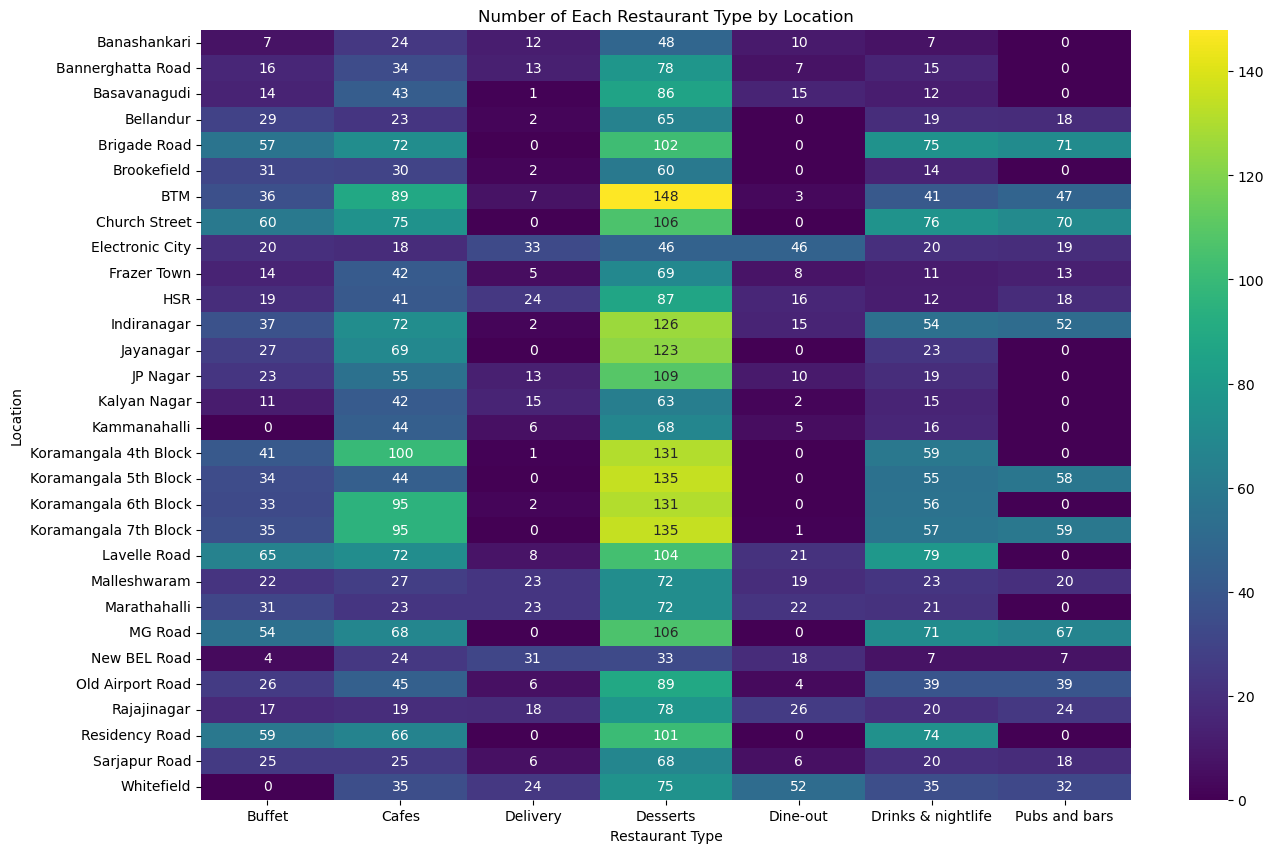

In [242]:
# code for heat map ~(˘▾˘~)
plt.figure(figsize=(15, 10))
sns.heatmap(top_type_location, annot=True, cmap='viridis', fmt='.0f')
plt.title('Number of Each Restaurant Type by Location')
plt.xlabel('Restaurant Type')
plt.ylabel('Location')
plt.show()

In [243]:
def highest_voted_restaurant(df, location):
    '''
    This function is used to return the type of restaurant that has the maximum number of votes.
    The parameter used is dataframe and column location
    '''
    max_votes = 0
    max_type = None
    for typ in df[df['location'] == location]['type'].unique(): # Iterate over unique restaurant types for the current location
        votes = df[(df['location'] == location) & (df['type'] == typ)]['votes'].sum()

        if votes > max_votes:  # Check if this restaurant type has more votes than the previous ma
            max_votes = votes
            max_type = typ

    return {'type': max_type, 'votes': max_votes}

all_location = df['location'].unique() 

data = {
    locate: highest_voted_restaurant(df, locate)
    for locate in all_location
}

top_voted_df = pd.DataFrame(data).T
top_voted_df.sort_values('votes', ascending= False) 

,type,votes
Koramangala 4th Block,Cafes,88697
Indiranagar,Drinks & nightlife,86812
Koramangala 6th Block,Cafes,86035
MG Road,Drinks & nightlife,85586
Brigade Road,Drinks & nightlife,84526
Koramangala 7th Block,Cafes,84474
Church Street,Drinks & nightlife,84139
Koramangala 5th Block,Pubs and bars,80538
Residency Road,Drinks & nightlife,76458
BTM,Pubs and bars,70186


### Visualization

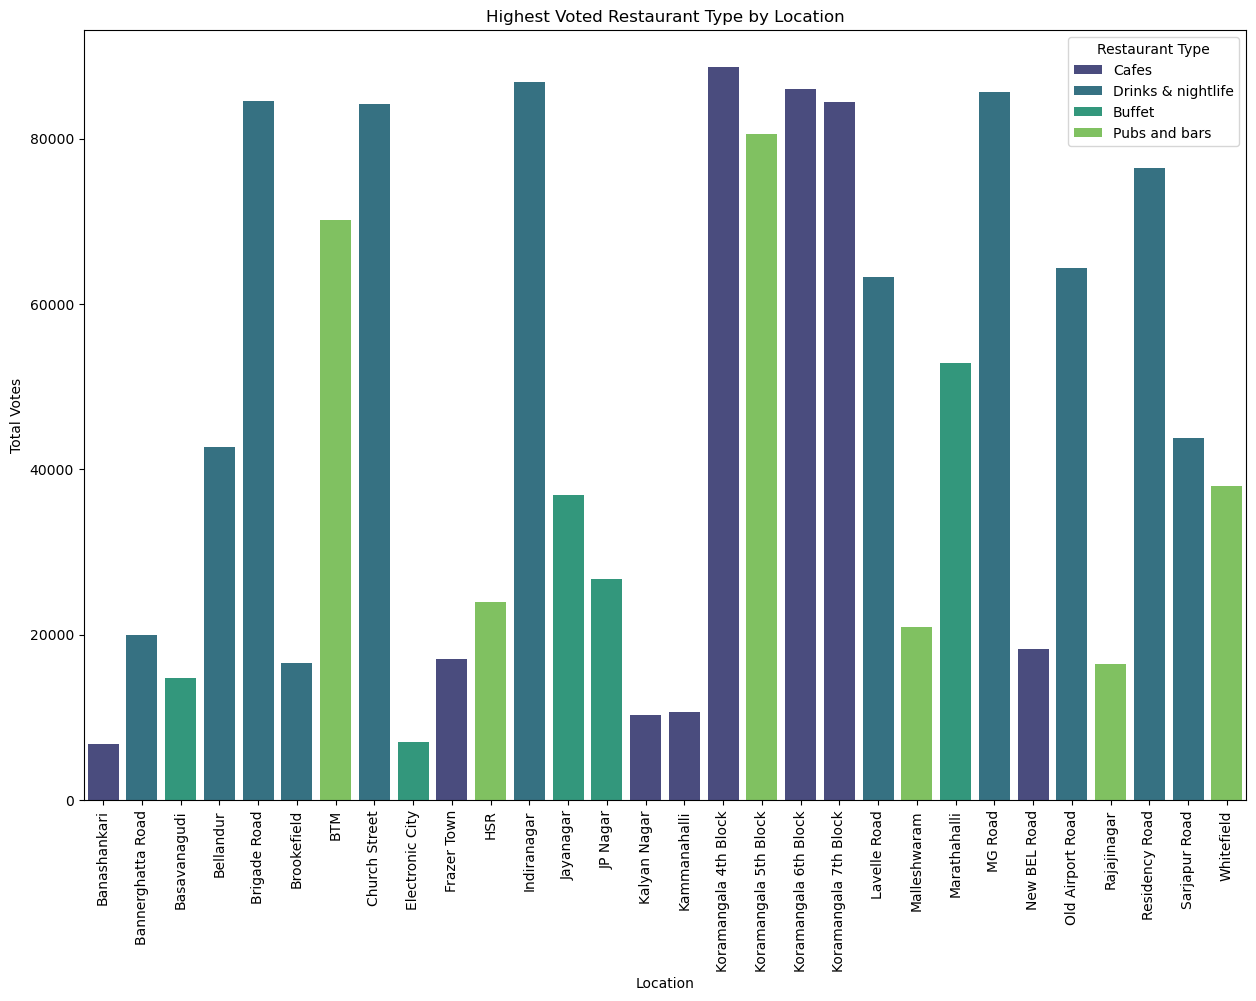

In [244]:
# Code for bar chart ~(˘▾˘~)
plt.figure(figsize=(15, 10))
sns.barplot(x=top_voted_df.index, y=top_voted_df['votes'], hue=top_voted_df['type'], palette='viridis', dodge=False)
plt.xticks(rotation=90)
plt.title('Highest Voted Restaurant Type by Location')
plt.ylabel('Total Votes')
plt.xlabel('Location')
plt.legend(title='Restaurant Type')
plt.show()

```
The visuals gave insights into the distribution of different restaurant types across various locations.


Diverse Culinary Interests: Some locations like "Koramangala 5th Block", "Koramangala 6th Block", and "Church Streethaveit a wide range of restaurant types with high count perhapss, indicating a diverse culinary intere.s.

Nightlife Hubs: Places like "Brigade Road", "Church Street", and "MG Road" have high votes for "Drinks & nightlife". This suggests that these areas might be considered nightlife hubs, possibly surrounded by offices or universities where people might prefer to hang out after work or class.ses.

Café Cultures: Locations such as "Koramangala 4th Block", "Koramangala 6th Block", and "Indiranagar" have significant votes for cafes. This implies a strong café culture in these amaybeesting a younger demog or a more relaxed environment that favors casual meet-ups.

Traditional Dining: Areas like "Marathahalli", "Jayanagar", and "JP Nagar" which have a higher count for "Buffet" and "Dine-out" suggest a preference for more traditional or family-oriented dining experiences.

Emerging Hotspots: Locations like "Whitefield" and "Kammanahalli" have fewer restaurants but still receive a good number of votes, indicating they might be emerging hotspots where new restaurants can potentially flourish.

Economic Indicators: The high vote count in certain areas might indicate higher footfall or disposable income of residents, leading to more visits and interactions with the establishments. In contrast, areas with fewer votes might be more residential with fewer commercial activities.

Variety vs. Dominance: While some areas showcase a variety of reslike auran and types ("HSR", "hurch Street"), others have a like "minant type ("Lavelle Road" with "Drink & nightlife"). Thtot of the area, the type of crowd it attracts, or zoning regulations.

Areas with Potential: Locations like "Banasankari" and "New BEL Road" have comparatively fewer restaurants of each type, indicating potential  for new restaurants.g restaurateurs.

In conclusion, each location's unique culture and market dynamics are reflected in the type and popularity of its restaurants. Whether driven by demographics, economic factors, or historical reasons, these insights provto be considered by investors.staurant industry.

---

## Each restaurant type has it's own uniqueness that caters to each customer (vote)

### Descriptive Statistics

In [245]:
def summarize_section(df, column):
    '''
    this function tho is different in away this is for each unique value of a column.
    The result is also automatically displayed based on each of the unique value.
    The parameter used is the data frame and a single column that can be aggregated
    '''
    return {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'std': df[column].std(),
        'skew': df[column].skew(),
        'kurtosis': df[column].kurtosis()
    }

all_type = df['type'].unique() # assinging it to a variable so it looks nice

data = {
    typ: summarize_section(df[df['type'] == typ], 'votes')
    for typ in all_type  # for every type in restaurant type
}

summary_type = pd.DataFrame(data).T # flipping the rows n columns
print("Restaurant type based on votes")
summary_type

Restaurant type based on votes


,mean,median,std,skew,kurtosis
Buffet,1033.982290,399.0,1690.488185,3.244593,12.469202
Cafes,543.718068,118.0,1272.516447,6.378929,56.937858
Delivery,73.079422,29.0,203.791918,11.996384,172.557015
Desserts,197.987841,47.0,546.115517,8.441514,103.450788
Dine-out,92.294118,15.5,232.578360,5.623650,39.741088
Drinks & nightlife,1204.774163,582.0,1738.975222,3.298617,17.749316
Pubs and bars,1111.259494,410.0,1699.913795,2.710412,8.461479


### Visualization

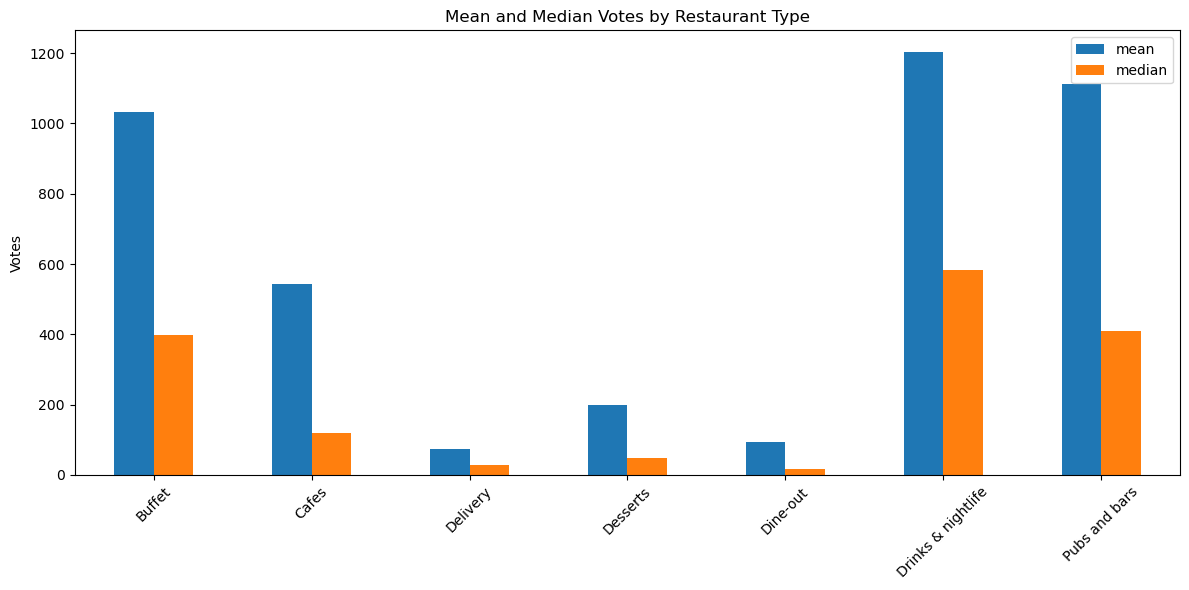

In [246]:
plt.figure(figsize=(12, 6))
summary_type[['mean', 'median']].plot(kind='bar', ax=plt.gca())
plt.title('Mean and Median Votes by Restaurant Type')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

```
Buffets have the highest mean votes among all restaurant types, over 1000 votes on average. Their median votes are also relatively high but are around 400, which indicates that while many buffets get a moderate number of votes, there are a few buffets that receive an extremely high number of votes, thus raising the mean.

Cafehass, close to 600. However, the median for cafes is around 200, indicating a skewed distribution with a few cafes receivi y high votes.

Delivery restaurants have mean votes close to 100, with the median being below 50. This suggests that most delivery restaurants receive a relatively low number of votes, but a few outliers have significantly more votes.

Desserts restaurants generally have lower engagement, with both the mean and median votes being below 250. Their median votes are particularly low, under 50, implying that a significant proportion of dessert places receive a very small number of votes.

Dine-out restaurants have the lowest median and mean votes among all types, indicating they are less popular or less visible on the platform compared to other types.

Drinks & nightlife spots are quite popular. They have mean votes over 1000, and their median is also considerably high, suggesting that a good number of such places receive a significant numbercial hubs.

Pubs and bars also have a good presence, with mean votes surpassing 1000. Their median is around 400, suggtablishments have very high votes which pull the mean up.

### Kruskal Test

In [247]:
#ataaaaa
samples = [df['votes'][df['type'] == typ] for typ in df['type'].unique()]

# The Kruskal-Wallis test
H_statistic, p_val = kruskal(*samples)

print(f"H-statistic: {H_statistic}")
print(f"P-value: {p_val}")

H-statistic: 1757.5512543254558
P-value: 0.0


```
The Kruskal-Wallis tests the null hypothesis that the votes median of all groups is equal. This extremely small p-value indicates strong evidence against the null hypothesis. Thus, we can conclude that at least one type has a different median votes compared to the others.

```
in summary, each restaurant type has its own special thing that attracts people. Buffets get lots of votes because they offer lots of food choices. Cafes are cozy and have both regular visitors and some very popular ones. Delivery is about convenience, but only a few really stand out. Desserts shops are for sweet lovers, but not many get lots of votes. Dine-out places are casual and don’t get many votes. Places for drinks and nightlife are always busy and get many votes. Pubs and bars are fun and social, with some being really popular. In short, every type has something different that people like and vote for.

---

## Price trend of restaurants in each location is important for restaurants to appeal the appropriate customers

### Descriptive Statistics

In [248]:
all_location = df['location'].unique() # assinging it to a variable so it looks nice

data = {
    locate: summarize_section(df[df['location'] == locate], 'cost_for_two') # calling prev made function
    for locate in all_location  # for every location in the location unique values
}

summary_locate = pd.DataFrame(data).T # flipping the rows n columns
summary_locate

,mean,median,std,skew,kurtosis
Banashankari,450.000000,400.0,244.948974,0.974278,1.028391
Bannerghatta Road,554.601227,500.0,342.143291,1.176402,1.196537
Basavanagudi,498.830409,400.0,326.926562,1.638731,4.291709
Bellandur,845.512821,600.0,555.133573,0.614538,-0.821397
Brigade Road,1047.559682,1000.0,726.176878,1.065090,1.051340
Brookefield,748.175182,500.0,567.483116,1.233436,0.779854
BTM,717.843666,600.0,441.331753,0.692306,-0.525366
Church Street,1091.033592,1000.0,724.654262,0.972150,0.840347
Electronic City,695.544554,500.0,520.002823,1.460118,2.375074
Frazer Town,693.827160,500.0,545.926912,1.437210,2.057556


```
The price trends suggest that areas like MG Road, Indiranagar, and Residency Road tend to have expensive restaurants, attracting customers that's willing to spend more. On the other hand, areas like Banasankari might cater to a more budget-conscious crowd.

In the perspective of the restaurant owners, understanding these trends can be crucial. Opening a high-end restaurant in Banasankari might not be as fruitful as in MG Road. Similarly, a budget restaurants might thrive better in areas with consistent pricing like JP Nagar.

The skewness can also guide promotional strategies. In areas with a positive skew like Bannerghatta Road, marketing strategies that cater to both the general populace and the few willing to spend a premium can be effective.

Understanding the variance in pricing, as given by the standard deviation, can also help in positioning the restaurant appropriately within a location, ensuring that it aligns with the spending habits (price trend) and expectations of the local customers.

### Visualization

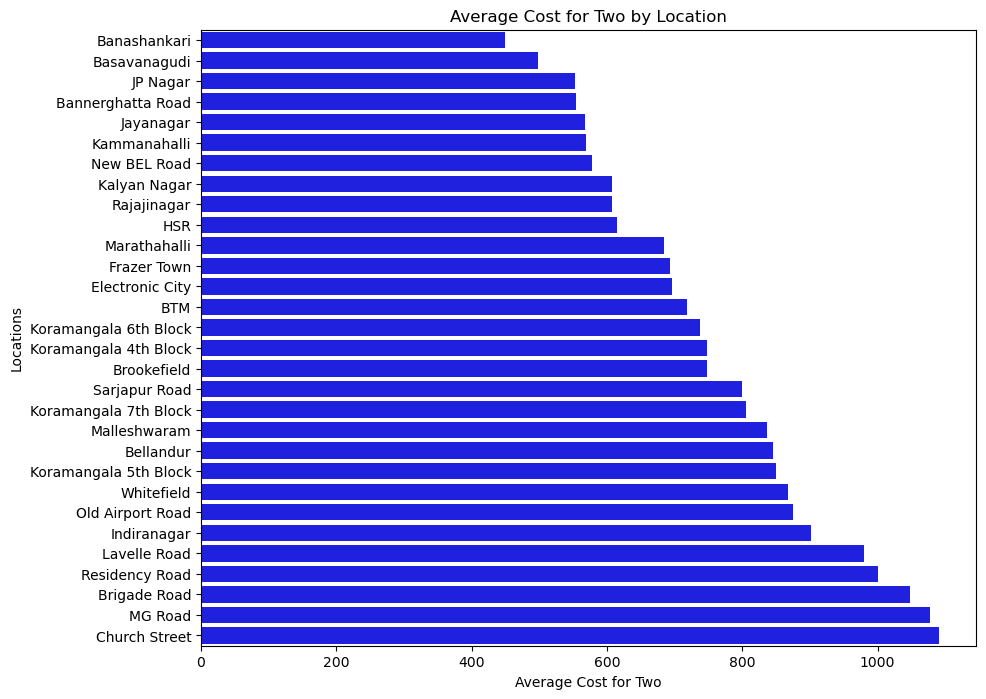

In [249]:
# Calculate average cost for each location
avg_costs = df.groupby('location')['cost_for_two'].mean()

# Sort the values for better visualization
avg_costs = avg_costs.sort_values()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(y=avg_costs.index, x=avg_costs.values, color="blue")
plt.title('Average Cost for Two by Location')
plt.ylabel('Locations')
plt.xlabel('Average Cost for Two')
plt.show()

```
Based on the char above, Restaurants costs is not consistent across all the locations. Some locations may have a broad range of restaurant costs, from low to high, while others might have prices clustered around a particular range.

### Kruskal Test

In [250]:
from scipy.stats import kruskal

groups = [df['cost_for_two'][df['location'] == locate] for locate in df['location'].unique()]

statistic, p_value = kruskal(*groups)

print(f"Statistic: {statistic}")
print(f"p-value = {p_value}")

Statistic: 559.1819180850388
p-value = 1.8247139598656577e-99


```
The Kruskal-Wallis test is a non-parametric alternative to the one-way ANOVA. It tests the null hypothesis that the population median of all groups is equal. This extremely small p-value indicates strong evidence against the null hypothesis. Thus, we can conclude that at least one location has a different median cost_for_two compared to the others.

```
the result of the tests means that the central tendency (in this case, the median) of restaurant costs differs across locations. This means that certain locations may generally be more expensive or cheaper than others.

```
in summary, the data shows that there are statistically significant data that suggest the existence of a price trend for each locations. Restaurants have a variety of prices in each location but they have their own pattern since the skew isn't that high. Locations can be good and have a higher priced restaurants and some are lower. Locations like "Church Street", "MG Road", and "Brigade Road" top the list with the highest average cost. "Whitefield", "Koramangala 5th Block", and "Bellandur" occupy the mid-section. "Banasankari", "Basavanagudi", and "JP Nagar" appear towards the bottom, suggesting a prevalence of budget-friendly dining options. The restaurant chosen need to follow the price trend of each of the resataurant's base of operation to get the most return. 

---

## High rated restaurants could have or set the cost trend

### Descriptive Statistics

In [251]:
avg_cost = df['cost_for_two'].mean()

above_avg_df = df[df['cost_for_two'] > avg_cost]
below_avg_df = df[df['cost_for_two'] <= avg_cost]

above_avg_stats = summarize_section(above_avg_df, 'cost_for_two')
below_avg_stats = summarize_section(below_avg_df, 'cost_for_two')

summary_data = {
    'Above Average': above_avg_stats,
    'Below Average': below_avg_stats
}
summary_df = pd.DataFrame(summary_data).T
print("Restaurant ratings vs cost")
summary_df

Restaurant ratings vs cost


,mean,median,std,skew,kurtosis
Above Average,1357.255937,1200.0,522.682587,1.776532,4.512862
Below Average,405.102326,400.0,169.509407,0.181296,-0.895015


```
Above Average Rated Restaurants:

Mean cost: The average cost for two at restaurants rated above average is approximately 1357.26.
Median cost: The middle value of the cost for two at restaurants rated above average is 1200. This indicates that the distribution of costs is right-skewed since the mean is greater than the median.
Standard Deviation: The spread of the cost around the mean is approximately 522.69, indicating a variation in cost among these restaurants.
Skewness: A positive value of 1.7765 means that the distribution has a longer right tail. This means there are a few restaurants that are significantly more expensive.
Kurtosis: The positive value of 4.5129 means that the distribution has heavier tails and a sharper peak than the normal distribution.

Below Average Rated Restaurants:

Mean cost: The average cost for two at restaurants rated below average is approximately 405.10.
Median cost: The middle value of the cost for two is 400.
Standard Deviation: The spread of the cost around the mean is approximately 169.51.
Skewness: A positive but small value of 0.1813 suggests that the distribution is almost symmetric with a slight right tail.
Kurtosis: The negative value of -0.8950 indicates a flatter peak than the normal distribution.

### Visualization

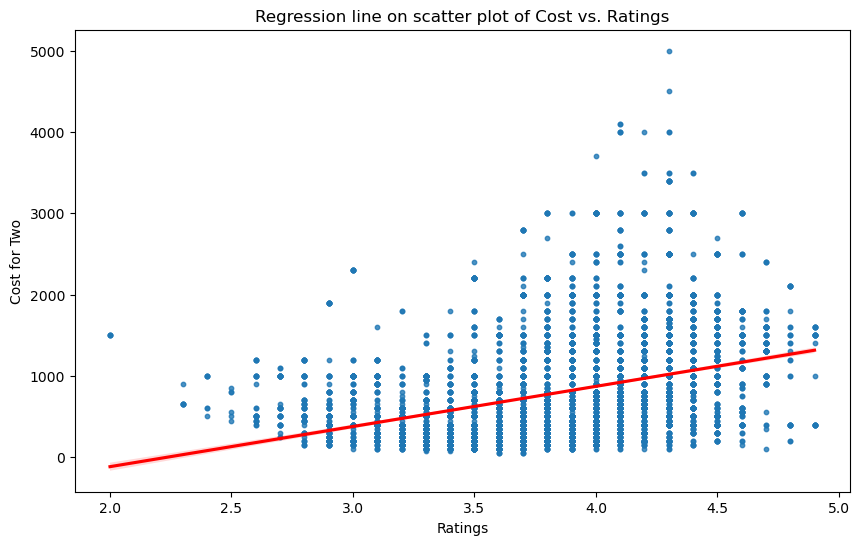

In [252]:
# scatter plottt
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='ratings', y='cost_for_two', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression line on scatter plot of Cost vs. Ratings')
plt.xlabel('Ratings')
plt.ylabel('Cost for Two')
plt.show()

```
The scatter plot visualizes the relationship between ratings and cost for two. As ratings increase, the cost tends to increase, which is confirmed by the positive slope of the regression line.


### Correlation

In [253]:
correlation = df['ratings'].corr(df['cost_for_two'])
print(f"Pearson correlation coefficient between rating and cost: {correlation:.3f}")

Pearson correlation coefficient between rating and cost: 0.369


```
A value of 0.369 indicates a positive linear relationship between ratings and cost. This means that, on average, restaurants with higher ratings tend to be more expensive.

### Regression

In [254]:
import statsmodels.api as sm

X = df['ratings']
X = sm.add_constant(X) 
y = df['cost_for_two']


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cost_for_two   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          5.84e-236
Time:                        20:04:11   Log-Likelihood:                -56661.
No. Observations:                7332   AIC:                         1.133e+05
Df Residuals:                    7330   BIC:                         1.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1105.7192     56.313    -19.635      0.0

```
Regression Analysis:
R-squared: 0.137 means that about 13.7% of the variability in the cost for two is explained by the ratings. While it's a low R-squared value, it's not uncommon for real-world data.

Coefficients:

Constant (Intercept): The expected cost for a restaurant with a rating of 0 is -1105.72. This doesn't have a practical interpretation since restaurants won't have a rating

Ratings: For each unit increase in rating, the cost for two increases by approximately 494.08, 494.08holding everything else constant. This coefficient is statistically significant with a very low p-value.

F-statistic and its p-value: Indicates that the model is statistically significant. The relationship observed is not due to random chance.

Skewness and Kurtosis: These values, when combined with the Jarque-Bera test, suggest that the residuals may not be normally distributed.

### T-test

```
All the data above suggests that the average cost of restaurants with rating above average is different than the ones that has rating below average.
The hypothesis we can use for this is mean cost of restaurants rating above average = mean cost of restaurants rating below average.

H0: mean cost of restaurants rating above average == mean cost of restaurants rating below average
H1: mean cost of restaurants rating above average != mean cost of restaurants rating below average

In [255]:
average_rating = df['ratings'].mean()

above_average = df[df['ratings'] > average_rating]['cost_for_two']
below_average = df[df['ratings'] <= average_rating]['cost_for_two']

t_stat, p_value = ttest_ind(above_average, below_average, equal_var=False)  # Assuming unequal variances (Welch's t-test)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 33.35355378647083
P-value: 6.900113460851551e-227


```
The very low p-value and the t-test means that we can reject the null hypothesis. This means that the mean cost of restaurants rated above average is significantly different from those rated below average.

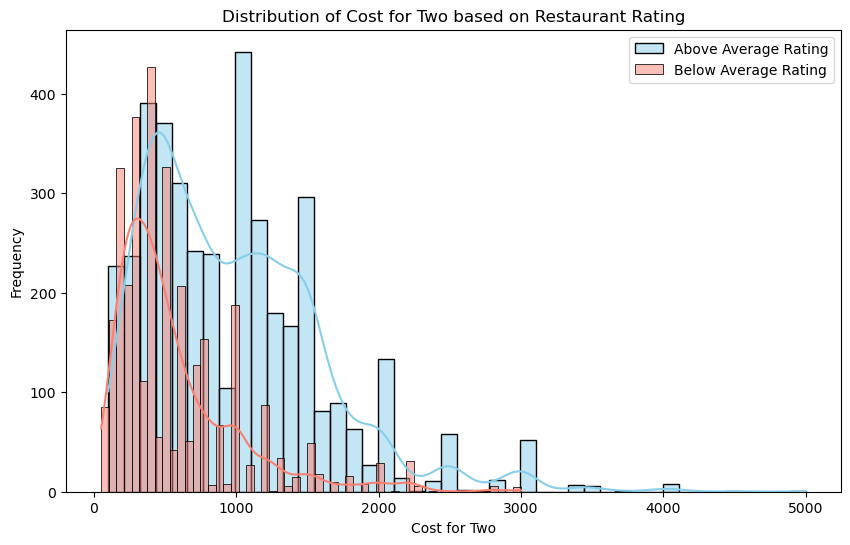

In [256]:
plt.figure(figsize=(10,6))
sns.histplot(above_average, color='skyblue', kde=True, label='Above Average Rating')
sns.histplot(below_average, color='salmon', kde=True, label='Below Average Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.title('Distribution of Cost for Two based on Restaurant Rating')
plt.legend()
plt.show()

```
The data above proves there are statistically significant difference between the cost between the restaurants that has the rating above average and the one below average. We can make a hypothesis where The mean cost of restaurants with ratings above average is equal to the mean cost of all restaurants to see if they could set the trend for the price.

```
H0 = The mean cost of restaurants with ratings above average is equal to the mean cost of all restaurants.
H1 = The mean cost of restaurants with ratings above average is not equal to the mean cost of all restaurants.

In [257]:
from scipy.stats import ttest_1samp

above_avg_rating = df[df['ratings'] > average_rating]
overall_mean_cost = df['cost_for_two'].mean()
t_stat, p_value = ttest_1samp(above_avg_rating['cost_for_two'], overall_mean_cost)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 18.916323052591544
P-value: 1.5461957002950572e-76


```
The p-value is extremely close to zero. This means there's very strong evidence to reject the null hypothesis. The mean cost of restaurants with ratings above average is significantly different from the mean cost of all restaurants. The positive t-statistic, means that restaurants with ratings above average have a higher mean cost compared to the overall mean cost of all restaurants.

### Visualization

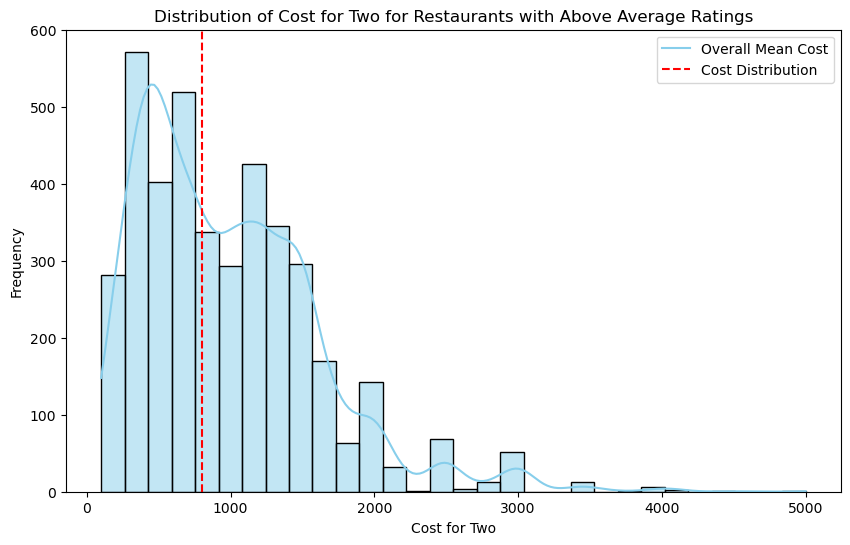

In [258]:
# Calculate average rating
average_rating = df['ratings'].mean()

# Filter data for ratings above average
above_avg_rating = df[df['ratings'] > average_rating]
overall_mean_cost = df['cost_for_two'].mean()

# Plot
plt.figure(figsize=(10,6))
sns.histplot(above_avg_rating['cost_for_two'], kde=True, color="skyblue", bins=30)
plt.axvline(overall_mean_cost, color='r', linestyle='--')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.title('Distribution of Cost for Two for Restaurants with Above Average Ratings')
plt.legend(labels=['Overall Mean Cost', 'Cost Distribution'])
plt.show()


```
In summary, the data suggests that there is a statistically significant relationship between ratings and cost: higher-rated restaurants, on average, tend to be more expensive. However, the higher cost at highly-rated restaurants could be due to various other factors that is not in the dataset. The more expensive and higher rated restaurant do not set the price trend, which indicates it would be wise picking restaurants that follow's the price trend from the previous data.

---

# Conclussion

```
The success and appeal of a restaurant are influenced by various factors. The customer's overall satisfaction with a restaurant's service, represented by its rating, plays a pivotal role. This rating is further proven when supported by number of votes, indicating broader customer endorsement. Votes not only validate a restaurant's rating but also act as indirect marketing, drawing in potential customers.

Location plays a dual role; it does not only dictates the restaurant's customer profile based on the location culture and economic environment but also set the trending restaurant types and pricing patterns within that area. The types of restaurants vary in popularity depending on the location's unique characteristics. For instance, nightlife hubs like "Brigade Road" or café cultures locations such as "Koramangala 4th Block".

Furthermore, the services a restaurant offers, such as online ordering or table reservations, can enhance its attractiveness as evidenced by restaurants with these features can get more votes.

The cost of dining at a restaurant has its own dynamics. Each location has a distinct price trend. Aligning with this trend is crucial for a restaurant's success. While high-rated restaurants might lean towards the pricier side, they don't necessarily dictate the price trend for an area. It's crucial to identify the prevailing price patterns within a location to maximize returns.

In conclussion, for a potential investor, it's not just about identifying high-rated restaurants but understanding the intricate web of factors that drive a restaurant's success. It's about pinpointing establishments that not only offer superior quality and service but also align with the trending preferences and price brackets of their respective locations. In doing so, they can harness maximum potential for their investment.

----

# TableU Link

[TableU URL](https://public.tableau.com/app/profile/achmad.dhani/viz/Achmad_Dhani_Milestone1/Dashboard1)